# Analiza zbioru danych - Wine


In [11]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
df = pd.read_csv("../dbs/wine/wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
# Liczba klas i ich rozkład
class_distribution = df['Wine'].value_counts()
class_distribution

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [14]:
# Liczba instancji
instance_count = df.shape[0]
instance_count

178

In [15]:
# Liczba i nazwy atrybutów
attribute_count = df.shape[1] - 1  # Odejmujemy 1, ponieważ jedna kolumna to etykieta klasy
attribute_names = df.columns[:-1].tolist()  # Pomijamy kolumnę 'Alcohol'
attribute_count, attribute_names

(13,
 ['Wine',
  'Alcohol',
  'Malic.acid',
  'Ash',
  'Acl',
  'Mg',
  'Phenols',
  'Flavanoids',
  'Nonflavanoid.phenols',
  'Proanth',
  'Color.int',
  'Hue',
  'OD'])

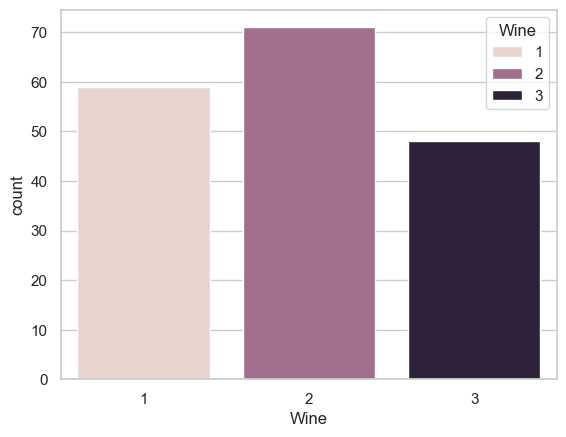

In [16]:
# sns.color_palette("mako", as_cmap=True)
# sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.set_theme( style="whitegrid", palette="muted",)
sns.countplot(x='Wine', data=df, hue='Wine')
plt.show()

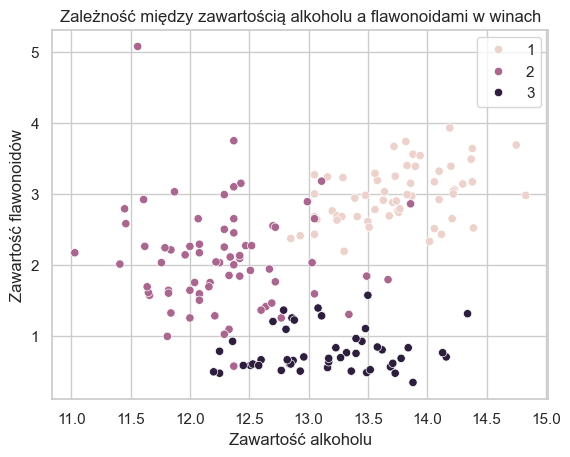

In [27]:
sns.scatterplot(x='Alcohol', y='Flavanoids', hue='Wine', data=df, )
plt.title("Zależność między zawartością alkoholu a flawonoidami w winach")  # Poprawiony tytuł
plt.xlabel("Zawartość alkoholu")  # Poprawiona nazwa osi X
plt.ylabel("Zawartość flawonoidów")  # Poprawiona nazwa osi Y
plt.legend(title="Klasa wina")

plt.legend()
plt.show()

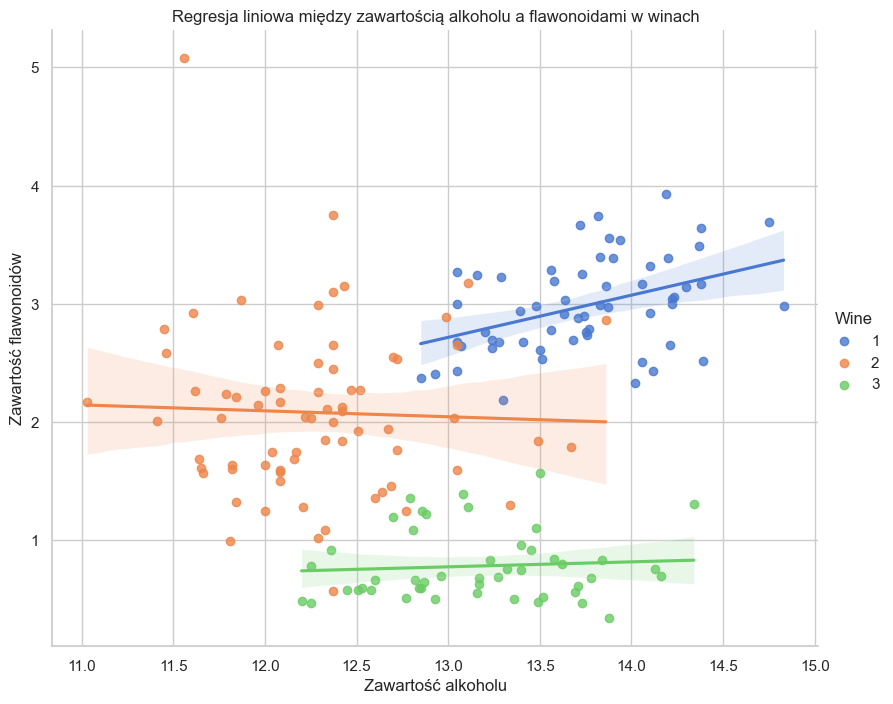

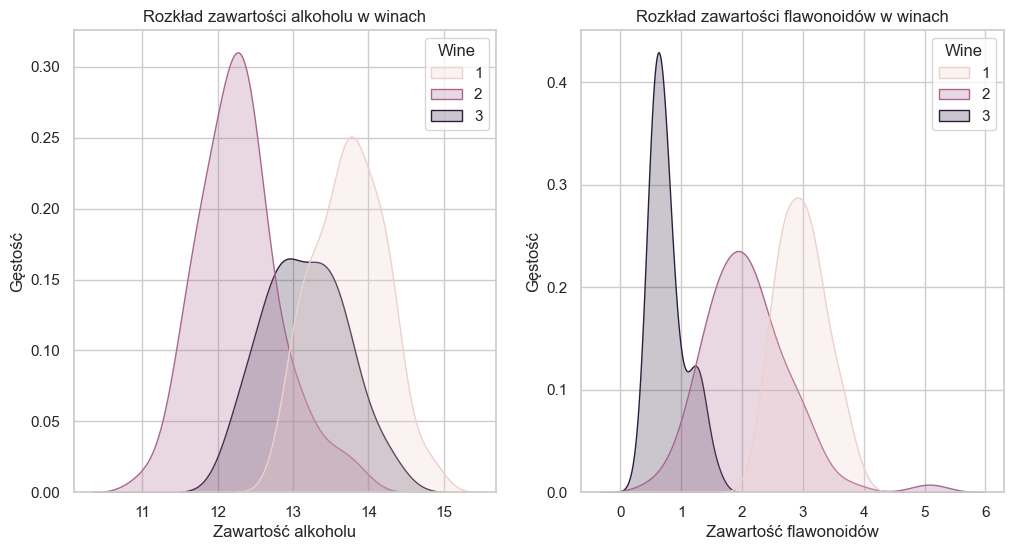

In [30]:
sns.lmplot(x="Alcohol", y="Flavanoids", hue="Wine", data=df, height=7, aspect=1.2)
plt.title("Regresja liniowa między zawartością alkoholu a flawonoidami w winach")  # Poprawiony tytuł
plt.xlabel("Zawartość alkoholu")  # Poprawiona nazwa osi X
plt.ylabel("Zawartość flawonoidów")  # Poprawiona nazwa osi Y
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="Alcohol", hue="Wine", fill=True)
plt.title('Rozkład zawartości alkoholu w winach')  # Poprawiony tytuł
plt.xlabel("Zawartość alkoholu")  # Poprawiona nazwa osi X
plt.ylabel("Gęstość")  # Poprawiona nazwa osi Y

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="Flavanoids", hue="Wine", fill=True)
plt.title('Rozkład zawartości flawonoidów w winach')  # Poprawiony tytuł
plt.xlabel("Zawartość flawonoidów")  # Poprawiona nazwa osi X
plt.ylabel("Gęstość")  # Poprawiona nazwa osi Y


plt.show()

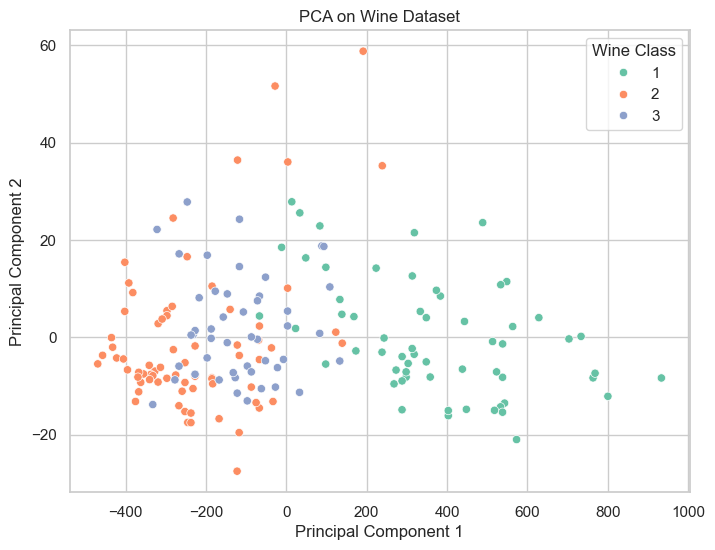

In [32]:
# PCA dla danych bez normalizacji
features = df.columns[1:]  # Pobieranie nazw cech, pomijając pierwszą kolumnę, która jest etykietą klasy
x = df.loc[:, features].values

# Zastosowanie PCA do redukcji wymiarów do 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Tworzenie DataFrame dla wyników PCA
pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Wine'] = df['Wine']

# Rysowanie wykresu wyników PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Wine", data=pca_df, palette="Set2")
plt.title('PCA on Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Wine Class")
plt.show()

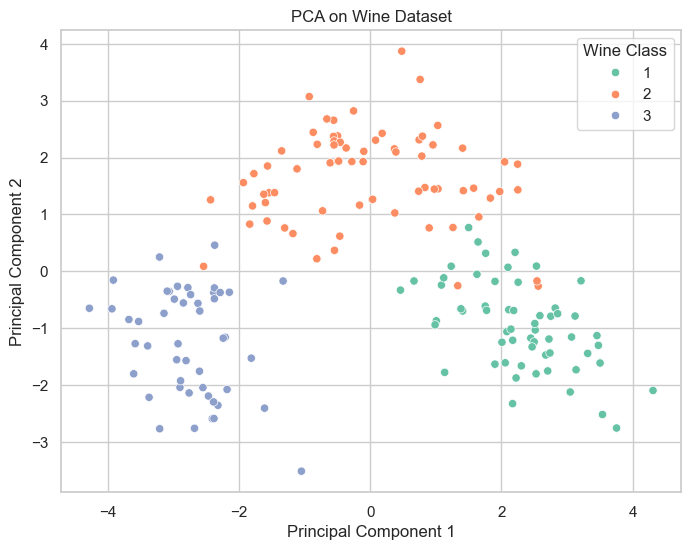

In [34]:
from sklearn.preprocessing import StandardScaler

# PCA dla danych znormalizowanych 
features = df.columns[1:]  # Pobieranie nazw cech, pomijając pierwszą kolumnę, która jest etykietą klasy
x = df.loc[:, features].values

# Normalizacja danych
x = StandardScaler().fit_transform(x)

# Zastosowanie PCA do redukcji wymiarów do 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Tworzenie DataFrame dla wyników PCA
pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Wine'] = df['Wine']

# Rysowanie wykresu wyników PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Wine", data=pca_df, palette="Set2")
plt.title('PCA on Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Wine Class")
plt.show()

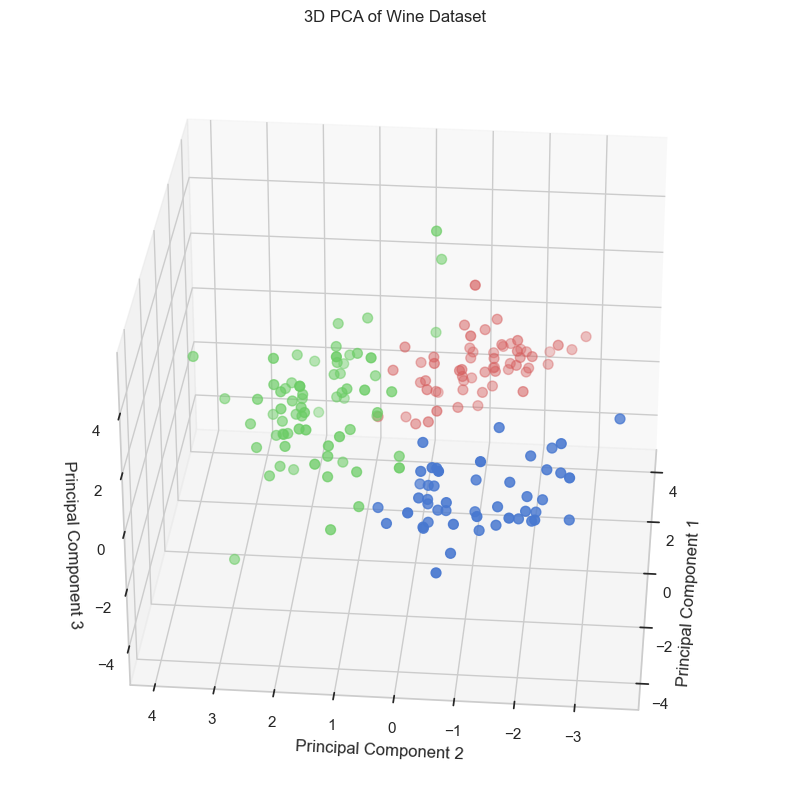

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# PCA do redukcji do 3 głównych komponentów
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(x)
principalDf_3d = pd.DataFrame(
    data=principalComponents_3d,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
)

# Dodanie etykiet klas do nowego DataFrame
finalDf_3d = pd.concat([principalDf_3d, df[['Wine']]], axis=1)

# Wykres 3D PCA
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Paleta kolorów dla klas wina
colors = {1: 'r', 2: 'g', 3: 'b'}
ax.scatter(finalDf_3d['Principal Component 1'], 
           finalDf_3d['Principal Component 2'], 
           finalDf_3d['Principal Component 3'],
           c=finalDf_3d['Wine'].apply(lambda x: colors[x]), s=50)

ax.view_init(elev=30, azim=185)

ax.set_title('3D PCA of Wine Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
